In [1]:
import numpy as np

In [2]:
X = np.random.rand(50,1)

In [51]:
X = np.sort(X, axis=0)

In [52]:
y = 5*X+2

In [53]:
y += np.random.normal(scale=0.33, size=y.shape)

In [54]:
import matplotlib.pyplot as plt

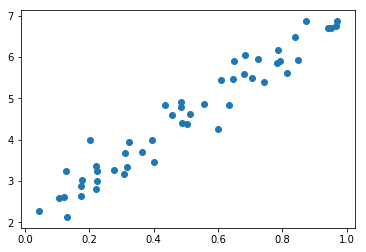

In [55]:
plt.scatter(X, y)
plt.show()

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [58]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
weights = model.coef_

In [60]:
weights

array([[4.98660949]])

In [61]:
weights[0][0] # угол

4.986609490307972

In [62]:
bias = (model.predict(X) - weights[0][0]*X)[0][0] # выдергиваем сдвиг модели

In [63]:
bias

2.0633990705674687

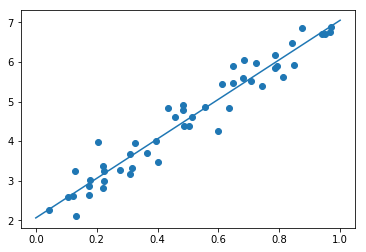

In [64]:
plt.scatter(X, y)
plt.plot(np.arange(0,2), np.arange(0,2)*weights[0][0] + bias)
plt.show()

In [65]:
from lightgbm import LGBMRegressor

In [86]:
tree = LGBMRegressor(min_child_samples=1, n_estimators=100, max_depth=10) 

In [87]:
tree.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=10, min_child_samples=1,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

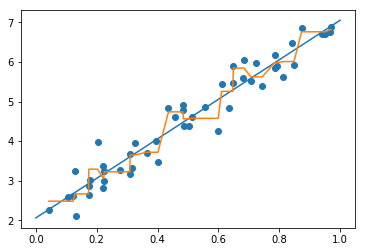

In [88]:
plt.scatter(X, y)
plt.plot(np.arange(0,2), np.arange(0,2)*weights[0][0] + bias)
plt.plot(X, tree.predict(X))
plt.show()

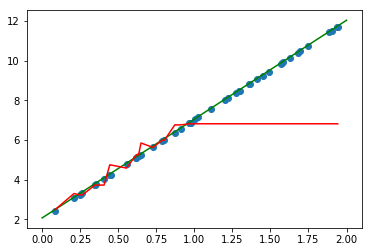

In [96]:
plt.plot(np.arange(0,3), np.arange(0,3)*weights[0][0] + bias, color='green')
plt.plot(2*X, tree.predict(2*X), color='red')
plt.scatter(2*X, 5*(2*X)+2)
plt.show()

In [115]:
tree_with_lin_y = LGBMRegressor(min_child_samples=1, n_estimators=2, max_depth=4) 

In [116]:
tree_with_lin_y.fit(X, (y - model.predict(X)))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=4, min_child_samples=1,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=2,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

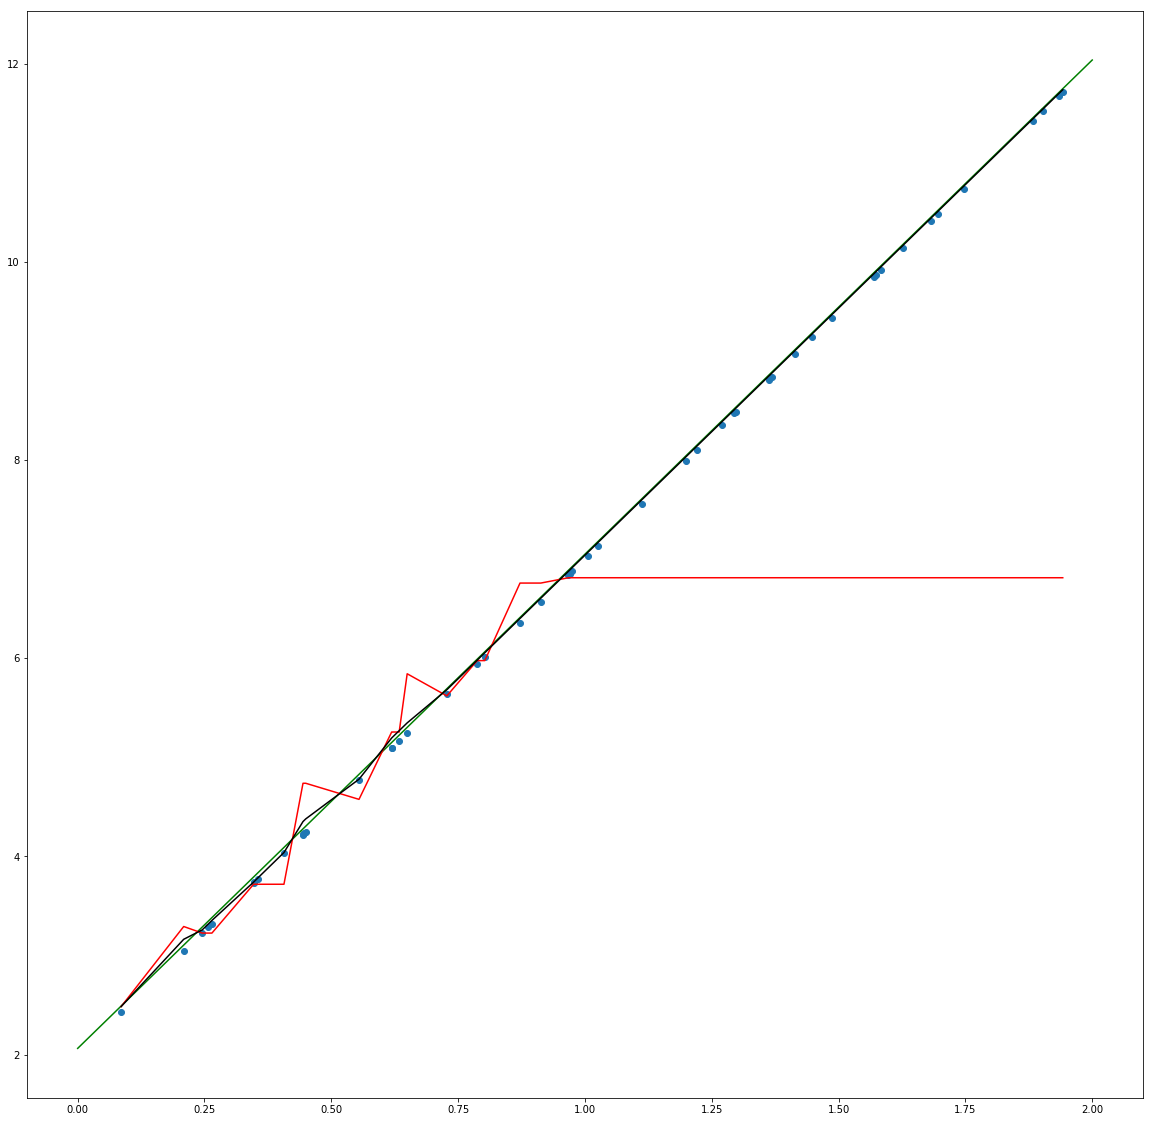

In [121]:
plt.figure(figsize=(20,20))
plt.scatter(2*X, 5*(2*X)+2)
plt.plot(np.arange(0,3), np.arange(0,3)*weights[0][0] + bias, color='green')
plt.plot(2*X, tree.predict(2*X), color='red')
plt.plot(2*X, tree_with_lin_y.predict(2*X) + model.predict(2*X).T[0], color='black')
plt.show()

In [107]:
(tree_with_lin_y.predict(2*X) + model.predict(2*X)).shape

(50, 50)

In [111]:
tree_with_lin_y.predict(2*X)

array([-0.02713148,  0.30753057, -0.18553551, -0.18553551, -0.18553551,
       -0.270345  , -0.270345  , -0.270345  , -0.270345  ,  0.38754649,
        0.38754649,  0.38754649,  0.38754649, -0.26038591,  0.0456526 ,
        0.0456526 ,  0.0456526 ,  0.4322925 , -0.05808997, -0.01582031,
       -0.01582031,  0.09610889,  0.09610889, -0.08367723, -0.08367723,
       -0.08367723, -0.08367723, -0.08367723, -0.08367723, -0.08367723,
       -0.08367723, -0.08367723, -0.08367723, -0.08367723, -0.08367723,
       -0.08367723, -0.08367723, -0.08367723, -0.08367723, -0.08367723,
       -0.08367723, -0.08367723, -0.08367723, -0.08367723, -0.08367723,
       -0.08367723, -0.08367723, -0.08367723, -0.08367723, -0.08367723])

In [113]:
model.predict(2*X).T[0]

array([ 2.49053986,  3.10571687,  3.28758453,  3.34625135,  3.38313928,
        3.79296114,  3.80113804,  3.83116676,  4.09114155,  4.27834596,
        4.27980021,  4.29002025,  4.30539459,  4.82883224,  5.15003509,
        5.15104477,  5.22370499,  5.30247059,  5.69245029,  5.99089933,
        6.0656465 ,  6.41158836,  6.61605005,  6.88813525,  6.90305241,
        6.92743456,  7.08294218,  7.1803991 ,  7.60632836,  8.04257529,
        8.15067039,  8.40169335,  8.51840169,  8.53562746,  8.85649683,
        8.88490605,  9.11585332,  9.28510864,  9.48030588,  9.88654267,
        9.91167164,  9.96475642, 10.17956227, 10.45002219, 10.52275123,
       10.77250846, 11.45697491, 11.55629203, 11.71136063, 11.74689597])

In [123]:
import torch

In [126]:
### TODO: Compare with Pytorch